# Importing libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import time

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..
from sklearn.model_selection import train_test_split
import scipy.stats as st

from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [4]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Preliminary Data Exploration

In [5]:
data_water= pd.read_csv("/Users/deshdeepak/ironhack/UNHCR/drinking_water.csv")
data_sanitation = pd.read_csv("sanitation.csv")
data_asylum = pd.read_excel("asylum_applications.xlsx")
data_refugees = pd.read_excel("demographics2.xlsx")




FileNotFoundError: [Errno 2] No such file or directory: 'asylum_applications.xlsx'

In [3]:
#renaming columns 

data_water = data_water.rename(columns={'Coverage':'Water_Coverage','Population':'Water_Population'})
data_water.head()
data_sanitation= data_sanitation.rename(columns={'Coverage':'Sanitation_Coverage','Population':'Sanitation_Population'})
data_sanitation.head()


,ISO3,Country,Residence Type,Service Type,Year,Sanitation_Coverage,Sanitation_Population,Service level
0,AGO,Angola,total,Sanitation,2001,28.98922,4.923316e+06,At least basic
1,AGO,Angola,total,Sanitation,2002,30.42247,5.346033e+06,At least basic
2,AGO,Angola,total,Sanitation,2003,31.85606,5.798876e+06,At least basic
3,AGO,Angola,total,Sanitation,2004,33.29039,6.280471e+06,At least basic
4,AGO,Angola,total,Sanitation,2005,34.72264,6.789158e+06,At least basic


In [4]:
data_water = data_water.drop(['ISO3','Residence Type','Service Type'], axis = 1)
data_sanitation = data_sanitation.drop(['ISO3','Residence Type','Service Type'], axis = 1)
data_water['Service level'].value_counts()
data_sanitation['Service level'].value_counts()

Limited service           906
Open defecation           906
Unimproved                906
At least basic            702
Safely managed service    204
Basic service             204
Name: Service level, dtype: int64

In [5]:
data_full = pd.concat([data_water,data_sanitation], axis=1)
data_full.isna().sum()

Country                  54
Year                     54
Water_Coverage           54
Water_Population         54
Service level            54
Country                   0
Year                      0
Sanitation_Coverage       0
Sanitation_Population     0
Service level             0
dtype: int64

In [6]:
data_full.sample(20)

,Country,Year,Water_Coverage,Water_Population,Service level,Country,Year,Sanitation_Coverage,Sanitation_Population,Service level
2730,Seychelles,2016.0,3.75099,3.534480e+03,Surface water,Djibouti,2013,33.22972,2.979669e+05,Safely managed service
2352,Equatorial Guinea,2016.0,6.44658,7.874436e+04,Surface water,Mauritania,2016,33.24741,1.429977e+06,Open defecation
952,Benin,2013.0,9.32679,9.330941e+05,Limited service,Benin,2013,18.45657,1.846478e+06,Limited service
3016,Democratic Republic of the Congo,2014.0,36.09955,2.661362e+07,Unimproved,Central African Republic,2010,39.36921,1.751349e+06,Unimproved
3581,South Sudan,2012.0,14.45532,1.563813e+06,Unimproved,Sudan,2016,30.81039,1.219439e+07,Unimproved
1694,Togo,2002.0,4.15079,2.179778e+05,Limited service,Togo,2002,19.54445,1.026371e+06,Limited service
2004,Benin,2006.0,8.74219,7.183365e+05,Surface water,Cabo Verde,2007,37.63155,1.830541e+05,Open defecation
3638,Chad,2001.0,41.69223,3.611802e+06,Unimproved,South Sudan,2015,17.45983,2.074601e+06,Unimproved
1163,Eritrea,2004.0,20.45710,7.893624e+05,Limited service,Eritrea,2004,8.39750,3.240279e+05,Limited service
3011,Democratic Republic of the Congo,2009.0,36.68171,2.289285e+07,Unimproved,Central African Republic,2005,46.56643,1.922220e+06,Unimproved


In [7]:
data_full2 = pd.merge(left = data_water, #this is a table
                                 right = data_sanitation, #this is a table
                                 how = 'right',  #how do we merge
                                 left_on = ["Country","Year","Service level"], 
                                 right_on= ["Country","Year","Service level"])

In [9]:
voice= pd.read_excel("Voice.xlsx")
political=pd.read_excel("Political.xlsx")
government=pd.read_excel("Government.xlsx")
regulatory= pd.read_excel("Regulatory.xlsx")
rule=pd.read_excel("Rule of Law.xlsx")
corruption=pd.read_excel("Control of Corruption.xlsx")
voice.shape

(864, 3)

In [10]:
data = pd.merge(left = voice, #this is a table
                                 right = political, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])

data2 = pd.merge(left = data, #this is a table
                                 right = government, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])
data3 = pd.merge(left = data2, #this is a table
                                 right = regulatory, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])
data4 = pd.merge(left = data3, #this is a table
                                 right = rule, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])
data5 = pd.merge(left = data4, #this is a table
                                 right = corruption, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])

In [11]:
data = pd.merge(left = data_full2, #this is a table
                                 right = data5, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country","Year"])
data.head(20)

,Country,Year,Water_Coverage,Water_Population,Service level,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption
0,Angola,2002,43.37680,7.622452e+06,At least basic,30.42247,5.346033e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657
2,Angola,2002,NaN,NaN,Open defecation,39.95439,7.021044e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657
3,Angola,2002,9.14162,1.606424e+06,Unimproved,17.20908,3.024091e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657
4,Angola,2003,44.36387,8.075720e+06,At least basic,31.85606,5.798876e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555
5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555
6,Angola,2003,NaN,NaN,Open defecation,38.48665,7.005867e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555
7,Angola,2003,9.67336,1.760877e+06,Unimproved,16.67727,3.035825e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555
8,Angola,2004,45.35134,8.555854e+06,At least basic,33.29039,6.280471e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878
9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878


In [12]:
data['Service level'].value_counts()

Limited service           725
Open defecation           725
Unimproved                725
At least basic            565
Safely managed service    160
Basic service             160
Name: Service level, dtype: int64

In [13]:
data.isna().sum()
data.to_csv('data_full2.csv')

In [14]:
data = data[data['Service level']== 'Limited service']

In [15]:
data.head(20)

,Country,Year,Water_Coverage,Water_Population,Service level,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption
1,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657
5,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555
9,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878
13,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073
17,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878
21,Angola,2007,16.83318,3.534579e+06,Limited service,15.11769,3.174365e+06,14.423077,24.154589,10.679611,16.504854,6.220096,5.825243
25,Angola,2008,16.16174,3.516701e+06,Limited service,15.61859,3.398515e+06,15.865385,31.250000,13.592233,16.019417,7.211538,4.854369
29,Angola,2009,15.48646,3.492126e+06,Limited service,16.12119,3.635254e+06,14.691943,32.701424,17.224880,15.311005,10.426540,2.392344
33,Angola,2010,14.80773,3.460439e+06,Limited service,16.62606,3.885365e+06,14.691943,37.914692,11.004785,16.267942,9.004740,3.809524
37,Angola,2011,14.12572,3.421047e+06,Limited service,17.13298,4.149361e+06,14.553990,34.597157,11.374408,12.322275,9.859155,4.265403


In [16]:
data.isna().sum()

Country                                        0
Year                                           0
Water_Coverage                                 0
Water_Population                               0
Service level                                  0
Sanitation_Coverage                            0
Sanitation_Population                          0
Voice and Accountability                       0
Political Stability and Absence of Violence    0
Government                                     0
Regulatory Quality                             0
Rule of Law                                    0
Control of Corruption                          0
dtype: int64

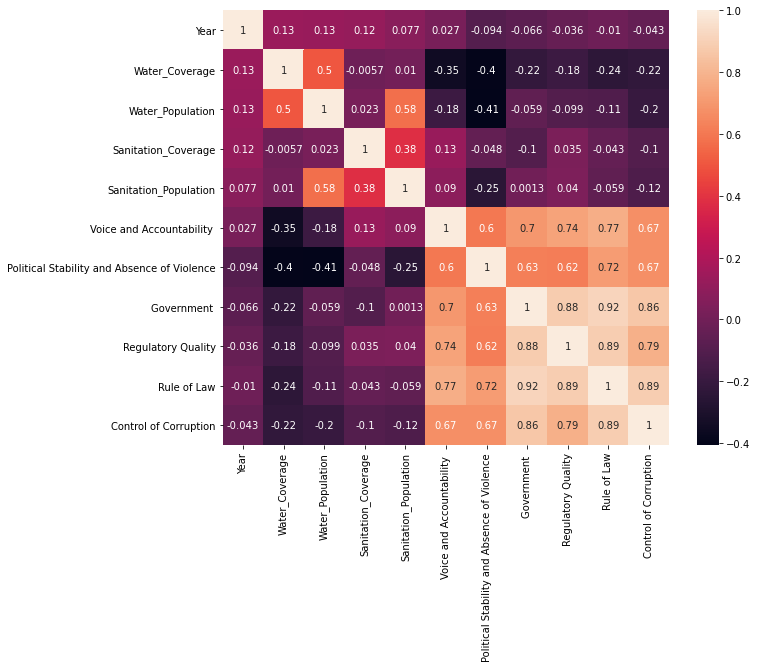

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
data_asylum.head()

,Year,Country of origin,applied
0,2006,Algeria,29
1,2006,Algeria,47
2,2006,Algeria,5
3,2006,Angola,156
4,2006,Angola,49


In [19]:
data.head()
data_asylum= data_asylum.groupby(by=['Country of origin','Year']).agg({'applied':sum}).reset_index()
data_asylum.head()

,Country of origin,Year,applied
0,Algeria,2000,7350
1,Algeria,2001,9945
2,Algeria,2002,9867
3,Algeria,2003,8041
4,Algeria,2004,10230


In [20]:
data1 = pd.merge(left = data, #this is a table
                                 right = data_asylum, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country of origin","Year"])

In [21]:
data1.head()
### WE NEED TO DROP BOTH country and years columns

,Country,Year,Water_Coverage,Water_Population,Service level,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,Country of origin,applied
0,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,Angola,5758
1,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,Angola,4035
2,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,Angola,4004
3,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,Angola,3168
4,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,Angola,2525


In [22]:
data_refugees.head()

,Year,Country of origin,Total
0,2002,Algeria,6
1,2002,Algeria,117
2,2002,Algeria,21
3,2002,Algeria,5
4,2002,Algeria,94


In [23]:

data_refugees= data_refugees.groupby(by=['Country of origin','Year']).agg({'Total':sum}).reset_index()
data_refugees.head()

,Country of origin,Year,Total
0,Algeria,2002,7176
1,Algeria,2003,7210
2,Algeria,2004,6627
3,Algeria,2005,8883
4,Algeria,2006,4813


In [24]:
data = pd.merge(left = data1, #this is a table
                                 right = data_refugees, #this is a table
                                 how = 'inner',  #how do we merge
                                 left_on = ["Country","Year"], 
                                 right_on= ["Country of origin","Year"])

In [25]:
data


,Country,Year,Water_Coverage,Water_Population,Service level,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,Country of origin_x,applied,Country of origin_y,Total
0,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,Angola,5758,Angola,15744
1,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,Angola,4035,Angola,14057
2,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,Angola,4004,Angola,11940
3,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,Angola,3168,Angola,12003
4,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,Angola,2525,Angola,9807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Tunisia,2013,2.35883,2.598150e+05,Limited service,5.19830,5.725701e+05,45.070423,18.957346,52.132702,40.758293,49.295776,56.872040,Tunisia,2723,Tunisia,1975
643,Tunisia,2014,1.96563,2.190476e+05,Limited service,4.94291,5.508328e+05,55.172413,18.571428,48.076923,39.423077,52.884617,55.769230,Tunisia,2493,Tunisia,2208
644,Tunisia,2015,1.96560,2.215954e+05,Limited service,4.98836,5.623709e+05,55.665024,16.666666,49.038460,37.980770,55.288460,55.769230,Tunisia,2375,Tunisia,2808
645,Tunisia,2016,1.96500,2.240742e+05,Limited service,5.03209,5.738216e+05,56.157635,11.428572,44.230770,33.173077,54.807693,53.365383,Tunisia,2639,Tunisia,2727


In [26]:
data = data.drop(['Country of origin_x','Country of origin_y'], axis = 1)

In [27]:
data.isna().sum()

Country                                        0
Year                                           0
Water_Coverage                                 0
Water_Population                               0
Service level                                  0
Sanitation_Coverage                            0
Sanitation_Population                          0
Voice and Accountability                       0
Political Stability and Absence of Violence    0
Government                                     0
Regulatory Quality                             0
Rule of Law                                    0
Control of Corruption                          0
applied                                        0
Total                                          0
dtype: int64

In [28]:
data = data.rename(columns={'applied':'Total Asylum Applicantions','Total':'Total Number of Refugees'})

In [29]:
data.head()

,Country,Year,Water_Coverage,Water_Population,Service level,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,Total Asylum Applicantions,Total Number of Refugees
0,Angola,2002,20.01438,3.517056e+06,Limited service,12.41406,2.181480e+06,12.935324,9.523809,8.163265,6.632653,2.970297,6.565657,5758,15744
1,Angola,2003,19.40718,3.532760e+06,Limited service,12.98003,2.362802e+06,10.945273,19.597990,9.183674,11.224490,4.455446,5.555555,4035,14057
2,Angola,2004,18.79056,3.544974e+06,Limited service,13.55016,2.556334e+06,11.538462,16.504854,6.403941,9.852217,5.741627,7.804878,4004,11940
3,Angola,2005,18.16428,3.551578e+06,Limited service,14.12307,2.761419e+06,12.019231,21.359222,12.254902,10.294118,7.177033,7.317073,3168,12003
4,Angola,2006,17.50080,3.546083e+06,Limited service,14.61931,2.962223e+06,11.538462,27.536232,5.853659,13.235294,9.090909,7.804878,2525,9807


In [30]:
data.dtypes


Country                                         object
Year                                             int64
Water_Coverage                                 float64
Water_Population                               float64
Service level                                   object
Sanitation_Coverage                            float64
Sanitation_Population                          float64
Voice and Accountability                       float64
Political Stability and Absence of Violence    float64
Government                                     float64
Regulatory Quality                             float64
Rule of Law                                    float64
Control of Corruption                          float64
Total Asylum Applicantions                       int64
Total Number of Refugees                         int64
dtype: object

In [31]:
data.shape
data = data.drop_duplicates()
data2= data.drop(['Service level'],axis=1)

In [33]:
y= data2['Total Number of Refugees']
X= data2.drop(['Total Number of Refugees'],axis=1)


In [34]:
data2.head()

X_num= X.select_dtypes(include = np.number)
X_cat= X.select_dtypes(include = np.object)

# Normalizing data: make data range from 0 - 1, instead of from min to max
MinMaxtransformer = MinMaxScaler().fit(X_num)  # only numercial values
x_normalized = MinMaxtransformer.transform(X_num)
x_normalized= pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized.head()

,Year,Water_Coverage,Water_Population,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,Total Asylum Applicantions
0,0.000000,0.591911,0.120363,0.245803,0.055730,0.171372,0.107461,0.099880,0.079287,0.035503,0.080031,0.119874
1,0.066667,0.573953,0.120901,0.257009,0.060362,0.145007,0.221132,0.112365,0.134178,0.053254,0.067719,0.083972
2,0.133333,0.555717,0.121319,0.268298,0.065307,0.152866,0.186231,0.078354,0.117774,0.068628,0.095136,0.083326
3,0.200000,0.537196,0.121545,0.279642,0.070546,0.159236,0.241005,0.149942,0.123056,0.085785,0.089190,0.065907
4,0.266667,0.517574,0.121357,0.289468,0.075676,0.152866,0.310703,0.071621,0.158215,0.108661,0.095136,0.052509


In [35]:
X_cat2 = pd.get_dummies(X_cat, drop_first=True)
X_cat2.head()


,Country_Angola,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Chad,Country_Comoros,Country_Djibouti,Country_Equatorial Guinea,...,Country_Sierra Leone,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Togo,Country_Tunisia,Country_Uganda,Country_Zambia,Country_Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X = pd.concat([x_normalized, X_cat2], axis=1)
X.head()

,Year,Water_Coverage,Water_Population,Sanitation_Coverage,Sanitation_Population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,...,Country_Sierra Leone,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Togo,Country_Tunisia,Country_Uganda,Country_Zambia,Country_Zimbabwe
0,0.000000,0.591911,0.120363,0.245803,0.055730,0.171372,0.107461,0.099880,0.079287,0.035503,...,0,0,0,0,0,0,0,0,0,0
1,0.066667,0.573953,0.120901,0.257009,0.060362,0.145007,0.221132,0.112365,0.134178,0.053254,...,0,0,0,0,0,0,0,0,0,0
2,0.133333,0.555717,0.121319,0.268298,0.065307,0.152866,0.186231,0.078354,0.117774,0.068628,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,0.537196,0.121545,0.279642,0.070546,0.159236,0.241005,0.149942,0.123056,0.085785,...,0,0,0,0,0,0,0,0,0,0
4,0.266667,0.517574,0.121357,0.289468,0.075676,0.152866,0.310703,0.071621,0.158215,0.108661,...,0,0,0,0,0,0,0,0,0,0


In [38]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()
X_test.head()
y_train.head()
y_test.head()
X_train.columns

(452, 55)
(195, 55)
(452,)
(195,)


Index(['Year', 'Water_Coverage', 'Water_Population', 'Sanitation_Coverage',
       'Sanitation_Population', 'Voice and Accountability ',
       'Political Stability and Absence of Violence', 'Government ',
       'Regulatory Quality', 'Rule of Law', 'Control of Corruption',
       'Total Asylum Applicantions', 'Country_Angola', 'Country_Benin',
       'Country_Botswana', 'Country_Burkina Faso', 'Country_Burundi',
       'Country_Cameroon', 'Country_Chad', 'Country_Comoros',
       'Country_Djibouti', 'Country_Equatorial Guinea', 'Country_Eritrea',
       'Country_Eswatini', 'Country_Ethiopia', 'Country_Gabon',
       'Country_Ghana', 'Country_Guinea', 'Country_Guinea-Bissau',
       'Country_Kenya', 'Country_Lesotho', 'Country_Liberia', 'Country_Libya',
       'Country_Madagascar', 'Country_Malawi', 'Country_Mali',
       'Country_Mauritania', 'Country_Mauritius', 'Country_Morocco',
       'Country_Mozambique', 'Country_Namibia', 'Country_Niger',
       'Country_Nigeria', 'Country_Rwan

In [39]:
from sklearn.linear_model import LinearRegression


In [40]:
LR = LinearRegression().fit(X_train,y_train)

In [41]:
y_pred = LR.predict(X_test)
r2_score(y_pred,y_test)

0.8486740766614345

In [61]:
def func_train_test(model): #lm= list of models
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score of LR model is: ',r2_score(y_test, y_pred),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=3)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return print('no model applicable')

In [62]:
func_train_test('LinearRegression')

R2 score of LR model is:  0.8809500884061422 & score is:  0.8809500884061422
